<a href="https://colab.research.google.com/github/ivaben/Alcohol-Consumption---EU/blob/master/PROJECT_alcohol_consuption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import statsmodels.api as sm

In [0]:
# uploding first dataset
pop_url = 'https://raw.githubusercontent.com/ivaben/Alcohol-Consumption---EU/master/population2011.csv'


In [186]:
df1 = pd.read_csv(pop_url)
df1.head()

,country,total_pop,prct_yng_adt_pop
0,Belgium,11000638,18.485146
1,Bulgaria,7364570,18.432577
2,Estonia,1294455,19.688363
3,Ireland,4574888,20.601335
4,Greece,10816286,17.604416


In [140]:
df1.shape

(32, 3)

In [141]:
# droping some unnecesary rows
df3 = df1.drop(df1.index[[28,30,31]])
df3.head(30)

,country,total_pop,prct_yng_adt_pop
0,Belgium,11000638,18.485146
1,Bulgaria,7364570,18.432577
2,Estonia,1294455,19.688363
3,Ireland,4574888,20.601335
4,Greece,10816286,17.604416
5,Spain,46815910,16.674331
6,France,64933400,18.527500
7,Croatia,4284889,18.551262
8,Italy,59433744,15.474973
9,Czechia,10436560,18.862489


In [6]:
# new dataframe with new column of codes
df4 = df3.assign(Codes = ['BEL', 'BGR','EST', 'IRL','GRC','ESP','FRA','HRV','ITA'
,'CZE','CYP','LVA','LTU','LUX', 'HUN','MLT','NLD','AUT','DNK','POL','PRT','ROU',
'DEU','SVN','SVK','FIN','SWE','GBR','NOR'])
df4.head(30)

,country,total_pop,prct_yng_adt_pop,Codes
0,Belgium,11000638,18.485146,BEL
1,Bulgaria,7364570,18.432577,BGR
2,Estonia,1294455,19.688363,EST
3,Ireland,4574888,20.601335,IRL
4,Greece,10816286,17.604416,GRC
5,Spain,46815910,16.674331,ESP
6,France,64933400,18.527500,FRA
7,Croatia,4284889,18.551262,HRV
8,Italy,59433744,15.474973,ITA
9,Czechia,10436560,18.862489,CZE


In [7]:
# rename columns
df4.rename  (columns = {"country" : "Country", "total_pop":"Population", "prct_yng_adt_pop": "Percentage_Y_A"}, inplace = True)
df4.head()

,Country,Population,Percentage_Y_A,Codes
0,Belgium,11000638,18.485146,BEL
1,Bulgaria,7364570,18.432577,BGR
2,Estonia,1294455,19.688363,EST
3,Ireland,4574888,20.601335,IRL
4,Greece,10816286,17.604416,GRC


In [0]:
year_url = 'https://raw.githubusercontent.com/ivaben/Alcohol-Consumption---EU/master/DP_LIVE_13112019174450740.csv'

In [143]:
# uploading second dataset
df2 = pd.read_csv(year_url)
df2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,ALCOHOL,TOT,LT_CAP15,A,1960,9.3,NaN
1,AUS,ALCOHOL,TOT,LT_CAP15,A,1961,9.4,NaN
2,AUS,ALCOHOL,TOT,LT_CAP15,A,1962,9.5,NaN
3,AUS,ALCOHOL,TOT,LT_CAP15,A,1963,9.8,NaN
4,AUS,ALCOHOL,TOT,LT_CAP15,A,1964,10.1,NaN


In [144]:
df2.shape

(2325, 8)

In [145]:
# droping columns from dataset
df8 = df2.drop(columns=['SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes','INDICATOR'])
df8.head()

,LOCATION,TIME,Value
0,AUS,1960,9.3
1,AUS,1961,9.4
2,AUS,1962,9.5
3,AUS,1963,9.8
4,AUS,1964,10.1


In [0]:
# making new columns 
df6 = ['BEL', 'BGR','EST', 'IRL','GRC','ESP','FRA','HRV','ITA'
,'CZE','CYP','LVA','LTU','LUX', 'HUN','MLT','NLD','AUT','DNK','POL','PRT','ROU',
'DEU','SVN','SVK','FIN','SWE','GBR','NOR']

In [146]:
df7 = df8[df8.LOCATION.isin(df6)]
df7.head()

,LOCATION,TIME,Value
57,AUT,1960,9.4
58,AUT,1961,10.0
59,AUT,1962,10.0
60,AUT,1963,10.8
61,AUT,1964,11.3


In [147]:
df7.shape

(1232, 3)

In [148]:
# rename columns 

df7.rename  (columns = {"LOCATION" : "Codes", "TIME":"Time"}, inplace = True)
df7.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Codes,Time,Value
57,AUT,1960,9.4
58,AUT,1961,10.0
59,AUT,1962,10.0
60,AUT,1963,10.8
61,AUT,1964,11.3


In [149]:
df7.tail()

,Codes,Time,Value
2262,LTU,2013,14.5
2263,LTU,2014,14.2
2264,LTU,2015,14.0
2265,LTU,2016,13.2
2266,LTU,2017,12.3


In [152]:
# merging firs and second dataset
df10 = pd.merge(df4, df7, how = 'inner', on = 'Codes')
df10.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
0,Belgium,11000638,18.485146,BEL,1963,9.9
1,Belgium,11000638,18.485146,BEL,1964,10.5
2,Belgium,11000638,18.485146,BEL,1965,10.8
3,Belgium,11000638,18.485146,BEL,1966,10.3
4,Belgium,11000638,18.485146,BEL,1967,10.7


In [153]:
df10.tail()

,Country,Population,Percentage_Y_A,Codes,Time,Value
1227,Norway,4979954,19.586546,NOR,2014,6.1
1228,Norway,4979954,19.586546,NOR,2015,6.0
1229,Norway,4979954,19.586546,NOR,2016,6.0
1230,Norway,4979954,19.586546,NOR,2017,6.0
1231,Norway,4979954,19.586546,NOR,2018,6.0


In [154]:
df10.shape

(1232, 6)

In [155]:
df10.isnull().sum()

Country           0
Population        0
Percentage_Y_A    0
Codes             0
Time              0
Value             0
dtype: int64

In [156]:
df10.describe()

,Population,Percentage_Y_A,Time,Value
count,1.232000e+03,1232.000000,1232.000000,1232.000000
mean,2.093559e+07,18.821175,1990.383117,11.119481
std,2.407804e+07,1.554206,16.144433,3.526056
min,5.123530e+05,15.474973,1960.000000,2.700000
25%,5.375276e+06,18.082004,1977.000000,8.875000
50%,9.937628e+06,18.677544,1991.000000,11.000000
75%,3.804456e+07,19.688363,2004.000000,13.200000
max,8.021970e+07,21.915808,2018.000000,23.200000


Text(0.5, 0, 'Countries')

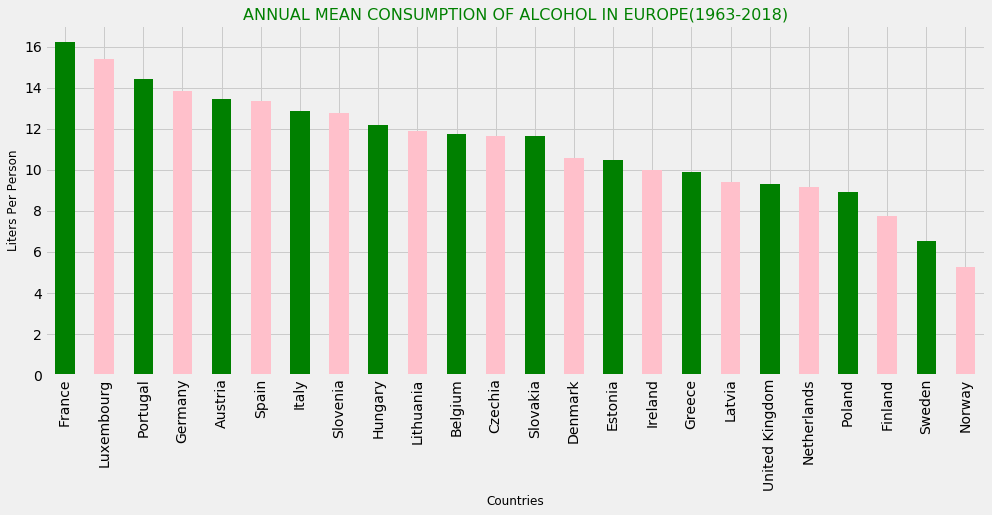

In [157]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = [15,6])
df10.groupby("Country").Value.mean().sort_values(ascending=False)[:29].plot.bar(color = ['green','pink'])
plt.title("ANNUAL MEAN CONSUMPTION OF ALCOHOL IN EUROPE(1963-2018)",loc = 'center', color = 'green', fontsize = 16)
plt.ylabel('Liters Per Person', fontsize = 12)
plt.xlabel('Countries', fontsize = 12)

In [158]:
sixties = [1963, 1964, 1965, 1966, 1967, 1968, 1969]

df_60 = df10[df10.Time.isin(sixties)]
df_60.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
0,Belgium,11000638,18.485146,BEL,1963,9.9
1,Belgium,11000638,18.485146,BEL,1964,10.5
2,Belgium,11000638,18.485146,BEL,1965,10.8
3,Belgium,11000638,18.485146,BEL,1966,10.3
4,Belgium,11000638,18.485146,BEL,1967,10.7


Text(0, 0.5, 'Countries')

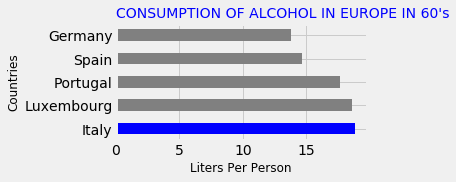

In [159]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = [4,2])

plt1 = df_60.groupby("Country").Value.mean().sort_values(ascending=False)[:5].plot.barh(color = ['blue','grey','grey','grey', 'grey'])
plt.title("CONSUMPTION OF ALCOHOL IN EUROPE IN 60's",loc = 'left', color = 'blue', fontsize = 14)
plt.xlabel('Liters Per Person', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)





In [0]:
seventies = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]

In [161]:
df_70 = df10[df10.Time.isin(seventies)]
df_70.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
7,Belgium,11000638,18.485146,BEL,1970,12.4
8,Belgium,11000638,18.485146,BEL,1971,12.6
9,Belgium,11000638,18.485146,BEL,1972,13.0
10,Belgium,11000638,18.485146,BEL,1973,13.8
11,Belgium,11000638,18.485146,BEL,1974,13.4


Text(0, 0.5, 'Countries')

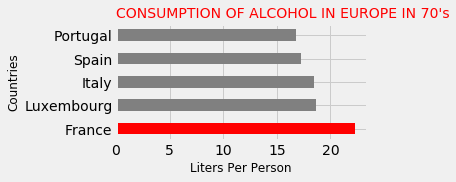

In [162]:
fig, ax = plt.subplots(figsize = [4,2])

plt2 = df_70.groupby("Country").Value.mean().sort_values(ascending=False)[:5].plot.barh(color = ['red','grey', 'grey','grey','grey'])
plt.title("CONSUMPTION OF ALCOHOL IN EUROPE IN 70's",loc = 'left', color = 'red', fontsize = 14)
plt.xlabel('Liters Per Person', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)

In [0]:
eighties = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]

In [39]:
df_80 = df10[df10.Time.isin(eighties)]
df_80.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
17,Belgium,11000638,18.485146,BEL,1980,14.0
18,Belgium,11000638,18.485146,BEL,1981,13.3
19,Belgium,11000638,18.485146,BEL,1982,13.7
20,Belgium,11000638,18.485146,BEL,1983,13.6
21,Belgium,11000638,18.485146,BEL,1984,13.3


Text(0, 0.5, 'Countries')

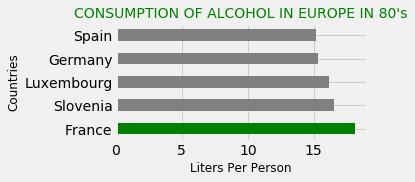

In [164]:
fig, ax = plt.subplots(figsize = [4,2])

plt3 = df_80.groupby("Country").Value.mean().sort_values(ascending=False)[:5].plot.barh(color = ['green','grey','grey','grey', 'grey'])
plt.title("CONSUMPTION OF ALCOHOL IN EUROPE IN 80's",loc = 'center', color = 'green', fontsize = 14)
plt.xlabel('Liters Per Person', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)

In [0]:
nineties = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]

In [166]:
df_90 = df10[df10.Time.isin(nineties)]
df_90.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
27,Belgium,11000638,18.485146,BEL,1990,12.2
28,Belgium,11000638,18.485146,BEL,1991,11.4
29,Belgium,11000638,18.485146,BEL,1992,11.7
30,Belgium,11000638,18.485146,BEL,1993,11.7
31,Belgium,11000638,18.485146,BEL,1994,11.1


Text(0, 0.5, 'Countries')

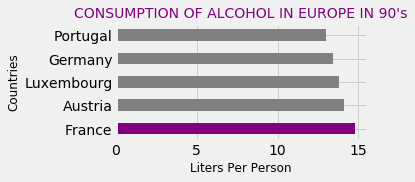

In [167]:
fig, ax = plt.subplots(figsize = [4,2])

plt4 = df_90.groupby("Country").Value.mean().sort_values(ascending=False)[:5].plot.barh(color = ['purple','grey','grey','grey', 'grey'])
plt.title("CONSUMPTION OF ALCOHOL IN EUROPE IN 90's", loc = 'center', color = 'purple', fontsize = 14)
plt.xlabel('Liters Per Person', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)


In [0]:
twenties = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]


In [169]:
df_00 = df10[df10.Time.isin(twenties)]
df_00.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
37,Belgium,11000638,18.485146,BEL,2000,11.3
38,Belgium,11000638,18.485146,BEL,2001,11.1
39,Belgium,11000638,18.485146,BEL,2002,11.3
40,Belgium,11000638,18.485146,BEL,2003,11.3
41,Belgium,11000638,18.485146,BEL,2004,12.1


Text(0, 0.5, 'Countries')

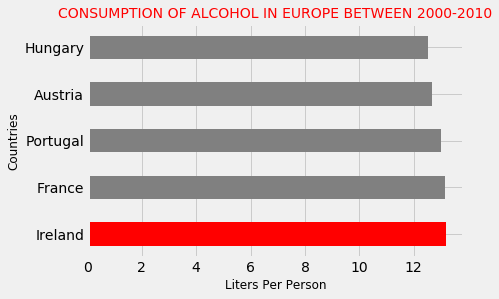

In [170]:
fig, ax = plt.subplots(figsize = [6,4])
plt5 = df_00.groupby("Country").Value.mean().sort_values(ascending=False)[:5].plot.barh(color = ['red','grey','grey','grey', 'grey'])
plt.title('CONSUMPTION OF ALCOHOL IN EUROPE BETWEEN 2000-2010', loc = 'center', color = 'red', fontsize = 14)
plt.xlabel('Liters Per Person', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)

In [171]:
y_10_18 = [2011,2012,2013,2014,2015,2016,2017,2018]
df_10_18 = df10[df10.Time.isin(y_10_18)]
df_10_18.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
48,Belgium,11000638,18.485146,BEL,2011,10.1
49,Belgium,11000638,18.485146,BEL,2012,10.1
50,Belgium,11000638,18.485146,BEL,2013,10.3
51,Belgium,11000638,18.485146,BEL,2014,10.6
52,Belgium,11000638,18.485146,BEL,2015,10.4


Text(0, 0.5, 'Countries')

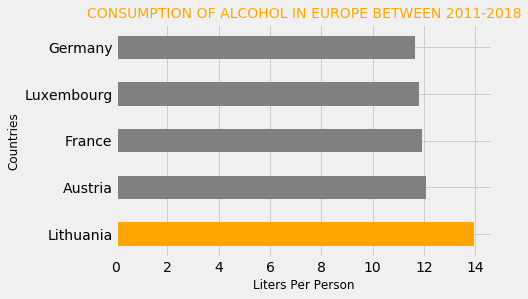

In [172]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = [6,4])
plt6 = df_10_18.groupby("Country").Value.mean().sort_values(ascending=False)[:5].plot.barh(color = ['orange','grey','grey','grey', 'grey'])
plt.title('CONSUMPTION OF ALCOHOL IN EUROPE BETWEEN 2011-2018',loc = 'center', color = 'orange', fontsize = 14)
plt.xlabel('Liters Per Person', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)

In [0]:
# uploading third dataset
alc_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv'


In [175]:
data = pd.read_csv(alc_url)
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
data_1 = ["France","Portugal","Germany","Austria", "Slovakia"]

In [177]:
data_2= data[data.country.isin(data_1)]
data_2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
9,Austria,279,75,191,9.7
61,France,127,151,370,11.8
65,Germany,346,117,175,11.3
136,Portugal,194,67,339,11.0
155,Slovakia,196,293,116,11.4


In [178]:
data_2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
9,Austria,279,75,191,9.7
61,France,127,151,370,11.8
65,Germany,346,117,175,11.3
136,Portugal,194,67,339,11.0
155,Slovakia,196,293,116,11.4


Text(0.5, 1.0, 'CONSUMPTION of BEER, WINE, and SPIRITS in 2010')

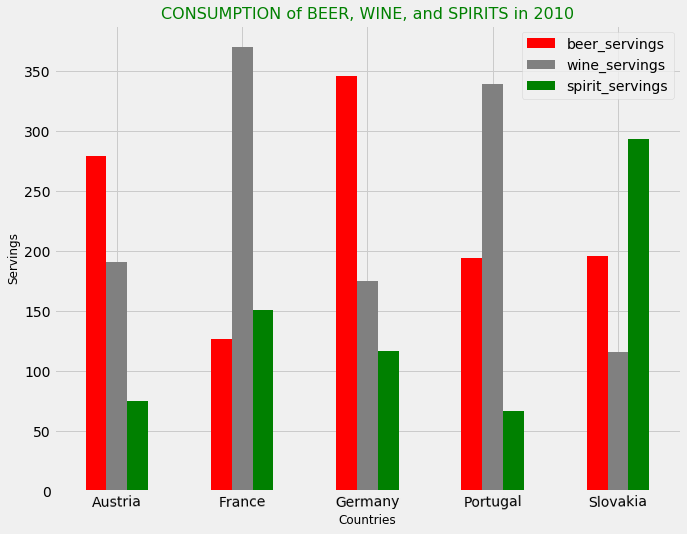

In [105]:

fig, variable_ax = plt.subplots(figsize=[10,8])
beer_servings = [279, 127, 346, 194, 196]
wine_servings = [191,370,175,339,116]
spirit_servings = [75,151,117,67,293]
index = ['Austria','France','Germany','Portugal','Slovakia']


df0 = pd.DataFrame({'beer_servings': beer_servings, 'wine_servings': wine_servings, 'spirit_servings': spirit_servings}, index=index)
df0.plot.bar(rot=1, color = ['red', 'grey','green'], ax=variable_ax)
plt.ylabel('Servings', fontsize = 12)
plt.xlabel('Countries', fontsize = 12)
plt.title('CONSUMPTION of BEER, WINE, and SPIRITS in 2010',loc = 'center', color = 'green', fontsize = 16)

In [179]:
df10.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
0,Belgium,11000638,18.485146,BEL,1963,9.9
1,Belgium,11000638,18.485146,BEL,1964,10.5
2,Belgium,11000638,18.485146,BEL,1965,10.8
3,Belgium,11000638,18.485146,BEL,1966,10.3
4,Belgium,11000638,18.485146,BEL,1967,10.7


In [0]:
SVK = ['Slovakia']
FRA = ['France']
GER = ['Germany']



In [181]:
newSVK = df10[df10.Country.isin(SVK)]
newSVK.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
942,Slovakia,5397036,21.908599,SVK,1960,6.9
943,Slovakia,5397036,21.908599,SVK,1961,7.1
944,Slovakia,5397036,21.908599,SVK,1962,7.4
945,Slovakia,5397036,21.908599,SVK,1963,8.1
946,Slovakia,5397036,21.908599,SVK,1964,9.3


In [182]:
newFRA = df10[df10.Country.isin(FRA)]
newFRA.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
248,France,64933400,18.5275,FRA,1970,23.2
249,France,64933400,18.5275,FRA,1971,22.9
250,France,64933400,18.5275,FRA,1972,22.6
251,France,64933400,18.5275,FRA,1973,22.8
252,France,64933400,18.5275,FRA,1974,22.5


In [183]:
newGER = df10[df10.Country.isin(GER)]
newGER.head()

,Country,Population,Percentage_Y_A,Codes,Time,Value
849,Germany,80219695,17.10559,DEU,1961,11.0
850,Germany,80219695,17.10559,DEU,1962,12.1
851,Germany,80219695,17.10559,DEU,1963,12.9
852,Germany,80219695,17.10559,DEU,1964,13.7
853,Germany,80219695,17.10559,DEU,1965,14.0


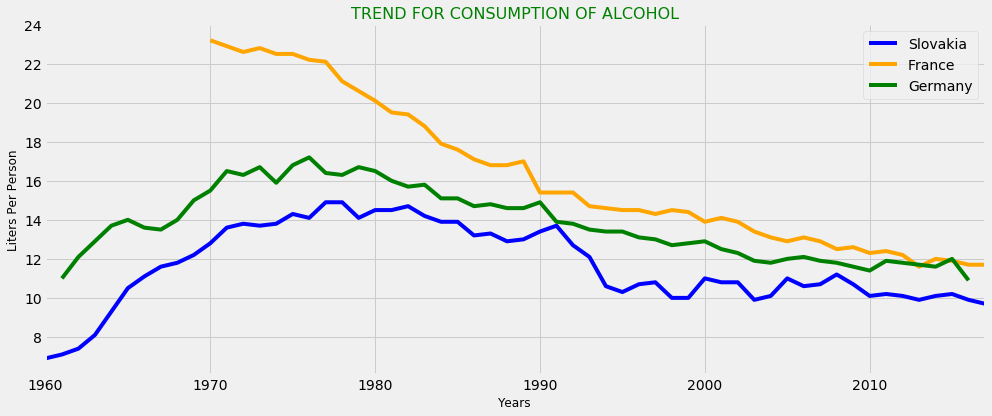

In [184]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = [15,6])
newSVK.set_index('Time')['Value'].plot(color ='blue')
newFRA.set_index('Time')['Value'].plot(color ='orange')
newGER.set_index('Time')['Value'].plot(color ='green')
plt.legend(labels = ['Slovakia','France','Germany'], loc =1)
plt.title('TREND FOR CONSUMPTION OF ALCOHOL',loc = 'center', color = 'green', fontsize = 16)
plt.ylabel('Liters Per Person', fontsize = 12)
plt.xlabel('Years', fontsize = 12)
plt.show()